In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = 'https://raw.githubusercontent.com/vaishnavipatil555/RecommenderSystem/main/reviews_Musical_Instruments.csv'
metadata = 'https://raw.githubusercontent.com/vaishnavipatil555/RecommenderSystem/main/meta_Musical_Instruments.csv'

In [3]:
df = pd.read_csv(dataset)
meta_df = pd.read_csv(metadata)

In [4]:
df = df.merge(meta_df, on='asin')

In [5]:
print(df.shape)
df.drop_duplicates(subset=['reviewerID', 'asin','unixReviewTime'],inplace=True)

(267371, 17)


In [6]:
df.shape

(10261, 17)

In [7]:
df.rename(columns={'asin':'productID'}, inplace=True)

In [8]:
df = df.drop(['unixReviewTime', 'reviewTime'], axis=1)

In [9]:
help_num = []
help_den = []
c = 0
for val in df.helpful.values:
  lst = list(val[1:-1].split(', '))
  help_num.append(int(lst[0]))
  help_den.append(int(lst[1]))
#pd.DataFrame({'lst1': help_num, 'lst2': help_den}, index = reviews.index)
df[['HelpfulnessNumerator','HelpfulnessDenominator']] = pd.DataFrame({'lst1': help_num, 'lst2': help_den}, index = df.index)

In [10]:
df['Helpful %'] = np.where(df['HelpfulnessDenominator'] > 0, df['HelpfulnessNumerator'] / df['HelpfulnessDenominator'], -1)

**Recommendation based on weighted average**

In [11]:
len(df.reviewerID.unique())

1429

In [12]:
len(df.productID.unique())

900

In [13]:
popular_products = pd.DataFrame(df.groupby('productID')['overall'].count())
popular_products

,overall
productID,
1384719342,5
B00004Y2UT,6
B00005ML71,5
B000068NSX,7
B000068NTU,5
...,...
B00H02C9TG,6
B00HFRXACG,11
B00IZCSW3M,24


In [14]:
popular_products.rename(columns={'overall':'votes'}, inplace=True)

In [15]:
avg = pd.DataFrame(df.groupby('productID')['overall'].mean())
avg

,overall
productID,
1384719342,5.000000
B00004Y2UT,4.666667
B00005ML71,3.800000
B000068NSX,4.571429
B000068NTU,4.800000
...,...
B00H02C9TG,4.833333
B00HFRXACG,4.818182
B00IZCSW3M,4.791667


In [16]:
new_df = df.drop('overall', axis=1)
new_df = new_df.merge(avg, on='productID')

In [17]:
new_df = new_df.merge(popular_products, on='productID')

In [18]:
new_df

,reviewerID,productID,reviewerName,helpful,reviewText,summary,title,price,imUrl,salesRank,categories,related,brand,description,HelpfulnessNumerator,HelpfulnessDenominator,Helpful %,overall,votes
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",good,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...,0,0,-1.000000,5.000000,5
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,Jake,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...,13,14,0.928571,5.000000,5
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,It Does The Job Well,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...,1,1,1.000000,5.000000,5
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...,0,0,-1.000000,5.000000,5
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,No more pops when I record my vocals.,niceEshop Studio Microphone Mic Wind Screen Po...,7.09,http://ecx.images-amazon.com/images/I/510D2cVp...,{'Musical Instruments': 2880},"[['Musical Instruments', 'Microphones & Access...","{'also_bought': ['B009D015TI', 'B004QJREXM', '...",niceEshop,New generic Studio Microphone Mic Wind Screen ...,0,0,-1.000000,5.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",Five Stars,Elixir Strings 16182 Acoustic Phosphor Bronze ...,15.99,http://ecx.images-amazon.com/images/I/51yMv5i7...,{'Musical Instruments': 628},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B00J4TBMVO', 'B000A6ASSS', '...",Elixir Strings,Elixir Acoustic HD Light Phosphor Bronze Strin...,0,0,-1.000000,4.538462,13
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,"Long life, and for some players, a good econom...",Elixir Strings 16182 Acoustic Phosphor Bronze ...,15.99,http://ecx.images-amazon.com/images/I/51yMv5i7...,{'Musical Instruments': 628},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B00J4TBMVO', 'B000A6ASSS', '...",Elixir Strings,Elixir Acoustic HD Light Phosphor Bronze Strin...,0,0,-1.000000,4.538462,13
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,Good for coated.,Elixir Strings 16182 Acoustic Phosphor Bronze ...,15.99,http://ecx.images-amazon.com/images/I/51yMv5i7...,{'Musical Instruments': 628},"[['Musical Instruments', 'Instrument Accessori...","{'also_bought': ['B00J4TBMVO', 'B000A6ASSS', '...",Elixir Strings,Elixir Acoustic HD Light Phosphor Bronze Strin...,0,0,-1.000000,4.538462,13
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""S

In [19]:
v = new_df['votes']
R = new_df['overall']
C = new_df['overall'].mean()
m = new_df['votes'].quantile(0.70)

In [20]:
new_df['weighted_avg'] = ((R*v) + (C*m)) / (v+m)

In [21]:
weighted_df = pd.DataFrame(new_df.groupby('productID')['weighted_avg'].mean())
weighted_df

,weighted_avg
productID,
1384719342,4.580040
B00004Y2UT,4.525555
B00005ML71,4.365754
B000068NSX,4.508037
B000068NTU,4.544325
...,...
B00H02C9TG,4.560038
B00HFRXACG,4.595327
B00IZCSW3M,4.643428


In [22]:
most_popular = weighted_df.sort_values('weighted_avg', ascending=False)
msp = most_popular.head(10)

In [23]:
for i in msp:
  i = msp[i]
  product_names = list(msp.index)
  print(product_names)

['B0015RIN6U', 'B0002E2XCW', 'B001W99HE8', 'B0002D0CEO', 'B000L6GD04', 'B0042EZH6W', 'B0002GLCRC', 'B0002M6CVC', 'B0016ZZKJO', 'B000EELB8W']


In [24]:
for i in product_names:
  print(i)
  print(df.loc[df['productID'] == i, ['title', 'helpful', 'overall']])

B0015RIN6U
                                  title   helpful  overall
162231  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162258  Korg Pitchblack Chromatic Tuner    [2, 2]      5.0
162285  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162312  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162339  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162366  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162393  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162420  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162447  Korg Pitchblack Chromatic Tuner  [32, 33]      5.0
162474  Korg Pitchblack Chromatic Tuner    [0, 0]      4.0
162501  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162528  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162555  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162582  Korg Pitchblack Chromatic Tuner    [0, 1]      5.0
162609  Korg Pitchblack Chromatic Tuner    [0, 0]      5.0
162636  Korg Pitchblack Chromatic Tuner    [0

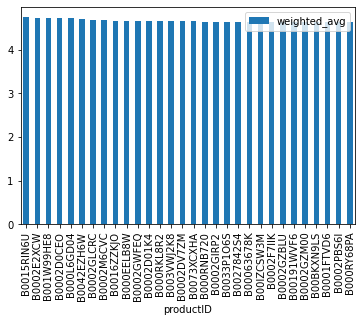

In [28]:
most_popular.head(30).plot(kind = "bar")